In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rawdata=pd.read_csv("D:\CSV Files\Clustering\\Pokemon.csv")

In [3]:
rawdata.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
rawdata.set_index("Name",inplace=True)

In [5]:
i=rawdata.iloc[:,4:10]

In [6]:
i

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,45,49,49,65,65,45
Ivysaur,60,62,63,80,80,60
Venusaur,80,82,83,100,100,80
VenusaurMega Venusaur,80,100,123,122,120,80
Charmander,39,52,43,60,50,65
...,...,...,...,...,...,...
Diancie,50,100,150,100,150,50
DiancieMega Diancie,50,160,110,160,110,110
HoopaHoopa Confined,80,110,60,150,130,70


In [7]:
i=pd.DataFrame(i)

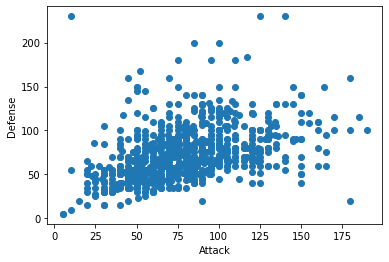

In [8]:
plt.scatter(i["Attack"],i["Defense"])
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
#Sum of Square
SS=[]
for x in range(1,11):
    kmeans = KMeans(n_clusters= x, init="k-means++", random_state=0)
    kmeans.fit(i)
    SS.append(kmeans.inertia_)

print(SS)

C:\Users\prata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[4288727.462500006, 2919114.809098043, 2539473.272882981, 2250512.48845674, 2070017.2530944115, 1929256.9651443565, 1816976.197623738, 1746005.6246434106, 1637188.0972294298, 1588825.4397423465]


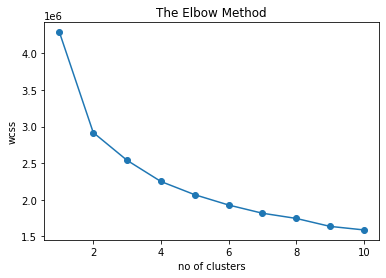

In [11]:
plt.plot(range(1,11), SS, marker="o")
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
km = KMeans(n_clusters=3, random_state=0)
y_kmeans = km.fit_predict(i)

In [13]:
i['K_cluster'] = y_kmeans

In [14]:
i

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,K_cluster
Name,,,,,,,
Bulbasaur,45,49,49,65,65,45,0
Ivysaur,60,62,63,80,80,60,0
Venusaur,80,82,83,100,100,80,1
VenusaurMega Venusaur,80,100,123,122,120,80,1
Charmander,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...
Diancie,50,100,150,100,150,50,2
DiancieMega Diancie,50,160,110,160,110,110,1
HoopaHoopa Confined,80,110,60,150,130,70,1


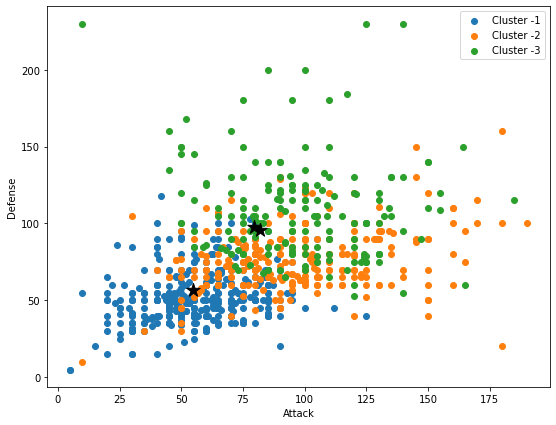

In [15]:
plt.figure(figsize=(9, 7))

plt.scatter(i[y_kmeans==0]["Attack"],i[y_kmeans==0]["Defense"],label="Cluster -1")
plt.scatter(i[y_kmeans==1]["Attack"],i[y_kmeans==1]["Defense"],label="Cluster -2")
plt.scatter(i[y_kmeans==2]["Attack"],i[y_kmeans==2]["Defense"],label="Cluster -3")

#PLotting the centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",s=200,marker = "*")

#for idx, row in X.iterrows(): 
    #plt.text(row['Attack'], row['Defense'], idx)

plt.legend()
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()


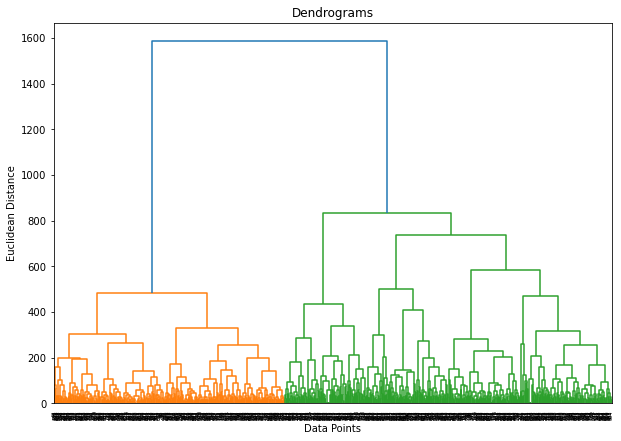

In [16]:
# Libraries & Dendograms

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(i, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

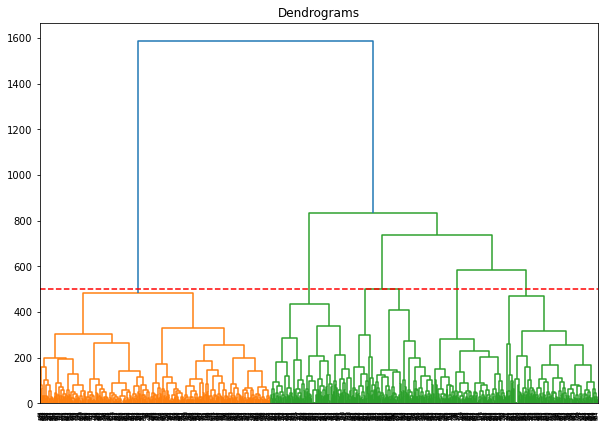

In [17]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(i, method='ward'))
plt.axhline(y=500, color='r', linestyle='--')

In [19]:
# Applying agglomerativeclustering(h-cluster type)

from sklearn.cluster import AgglomerativeClustering
H_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hclust = H_cluster.fit_predict(i)

In [21]:
# Adding the clusters to data points

i['H_Cluster'] = y_hclust

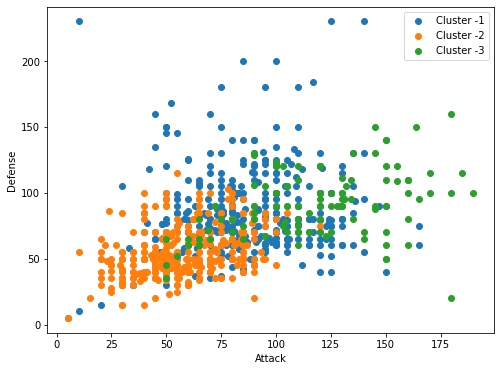

In [23]:
# Visualyzing the clusters

plt.figure(figsize=(8, 6))

plt.scatter(i[y_hclust==0]["Attack"],i[y_hclust==0]["Defense"],label="Cluster -1")
plt.scatter(i[y_hclust==1]["Attack"],i[y_hclust==1]["Defense"],label="Cluster -2")
plt.scatter(i[y_hclust==2]["Attack"],i[y_hclust==2]["Defense"],label="Cluster -3")

#for idx, row in X.iterrows(): 
    #plt.text(row['Attack'], row['Defense'], idx)
    
plt.legend()
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()